In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.manifold import TSNE
import torch
import torch.nn as nn
from torch.optim import SGD,Adam
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns
import hiddenlayer as hl
from torchviz import make_dot
from sklearn import preprocessing


In [2]:
training_path = './Data1/training.csv'
validation_path = ''
testing_path = ''

Raw_data=pd.read_csv(training_path, sep=',') #load the training dataset

print(Raw_data.shape)
print(Raw_data.head())
print('')
# print(index.shape)
# print(index.tail(20))

(552, 18)
        a1       a2       a3       a4       a5       a6       a7       a8  \
0  0.12708  0.36308  0.24832  1.40277  1.78100  0.13906  0.99968  0.68235   
1  0.13308  0.64109  0.27482  1.59564  2.41907  0.16875  1.12786  0.73878   
2  0.13779  0.47743  0.27204  1.47542  2.12243  0.13874  1.16911  0.93914   
3  0.15260  0.62122  0.26100  1.78310  2.57567  0.17871  1.45924  0.95658   
4  0.14655  0.49008  0.31137  1.92469  2.30774  0.13056  1.26919  0.88077   

        a9      a10      a11      a12      a13      a14      a15      a16  \
0  0.19462  0.13169  0.15453  0.11412  0.13647  0.42456  0.12294  0.16255   
1  0.22006  0.17024  0.13643  0.13178  0.13066  0.43593      NaN  0.20954   
2  0.23281  0.19274  0.13779  0.10636  0.12397  0.45320  0.21130  0.21082   
3  0.23160      NaN      NaN  0.14805  0.12165  0.43468      NaN      NaN   
4  0.20706  0.14715      NaN  0.11283  0.13142  0.49452  0.13988  0.15891   

       a17  class label  
0  0.15534            0  
1  0.34364  

In [3]:
# 均值填充
Clean_data = Raw_data
Clean_data['a10'] = Raw_data['a10'].fillna(Raw_data['a10'].mean())
Clean_data['a11'] = Raw_data['a11'].fillna(Raw_data['a11'].mean())
Clean_data['a13'] = Raw_data['a13'].fillna(Raw_data['a13'].mean())
Clean_data['a15'] = Raw_data['a15'].fillna(Raw_data['a15'].mean())
Clean_data['a16'] = Raw_data['a16'].fillna(Raw_data['a16'].mean())
Clean_data['a17'] = Raw_data['a17'].fillna(Raw_data['a17'].mean())

Clean_data.isnull().sum()
print(type(Clean_data))
# Raw_data.head()#print the first 5 rows

<class 'pandas.core.frame.DataFrame'>


In [4]:
X_train = Clean_data.iloc[:, 0:17].values
y_train = Clean_data['class label'].values

print(X_train.shape)
print(y_train.shape)

(552, 17)
(552,)


In [5]:
# 归一化
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
print((X_train.max(axis=0)>(1-1e-7)).sum(),(X_train.min(axis=0)==0).sum())
print(type(X_train))

17 17
<class 'numpy.ndarray'>


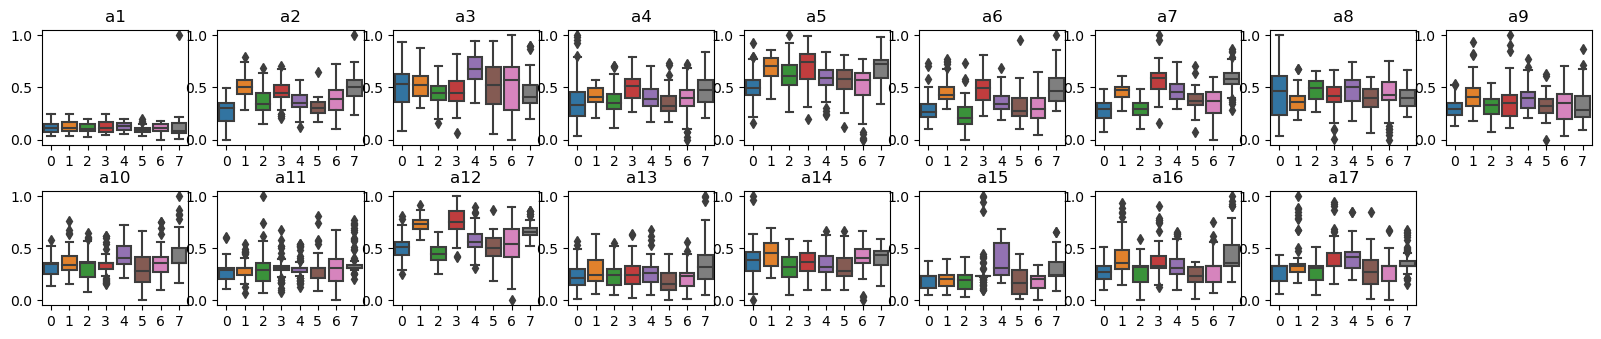

In [6]:
colname=Clean_data.columns.values[:-1]
plt.figure(figsize=(20,14))
for ii in range(len(colname)):
    plt.subplot(7,9,ii+1)
    sns.boxplot(x=y_train,y=X_train[:,ii])
    plt.title(colname[ii])
plt.subplots_adjust(hspace=0.4)
plt.show()

In [7]:
# class Net(torch.nn.Module):
#     def __init__(self, n_feature, n_hidden, n_output):
#         super(Net, self).__init__()
#         self.hidden = torch.nn.Linear(n_feature, n_hidden)
#         self.out = torch.nn.Linear(n_hidden, n_output)

#     def forward(self, x):
#         x = torch.nn.functional.relu(self.hidden(x))
#         x = self.out(x)
#         return x

# net = Net(17, 10, 8)
# print(net)

In [8]:
# optimizer = torch.optim.Adam(net.parameters(), lr=0.5)
# loss_func = torch.nn.MSELoss()  # 均方差

In [9]:
# X_train=torch.from_numpy(X_train.astype(np.float32))
# y_train=torch.from_numpy(y_train.astype(np.float32))



In [10]:
# X_train = torch.unsqueeze(torch.FloatTensor(X_train), dim=1)
# y_train = torch.unsqueeze(torch.FloatTensor(y_train), dim=1)

# print(X_train.shape)
# print(y_train.shape)

In [11]:
# for t in range(10000):
#     prediction = net(X_train)

#     loss = loss_func(prediction, y_train)  # 一定要prediction在前, y在后

#     optimizer.zero_grad()  # 梯度降零
#     loss.backward()
#     optimizer.step()
#     if t % 25 == 0:
# 	    # plot and show learning process
#         print('Loss=%.4f' % loss.data.numpy())



In [12]:
class FullyConnectedNuralNetwork(nn.Module):
    def __init__(self):
        super(FullyConnectedNuralNetwork,self).__init__()
        self.hidden1=nn.Sequential(
                nn.Linear(in_features=17,out_features=15,bias=True),
                nn.ReLU())
        self.hidden2=nn.Sequential(
                nn.Linear(in_features=15,out_features=8,bias=True),
                nn.ReLU())
#         self.hidden3=nn.Sequential(
#                 nn.Linear(in_features=13,out_features=8,bias=True),
#                 nn.ReLU())
#                 nn.Sigmoid())
            
    def forward(self,x):
        fc1=self.hidden1(x)
#         fc2=self.hidden2(fc1)
        output=self.hidden2(fc1)
        return fc1,output


FCNN1=FullyConnectedNuralNetwork()
# x=torch.randn(size=(1,17)).requires_grad_(True)
# y=FCNN1(x)
# FCArchitecture=make_dot(y,params=dict(list(FCNN1.named_parameters())+[('x',x)]))
# FCArchitecture.format='png'
# FCArchitecture.directory='../pic01/'
# FCArchitecture.view()

In [13]:
X_train=torch.from_numpy(X_train.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))

train_data=Data.TensorDataset(X_train,y_train)
train_loader=Data.DataLoader(dataset=train_data,batch_size=64,shuffle=True,num_workers=1)
for step,(batch_x,batch_y) in enumerate(train_loader):
    if step>0:
        break
print(step,batch_x.shape,batch_y.shape)



1 torch.Size([64, 17]) torch.Size([64])


In [14]:
# optimal
optomizerAdam=torch.optim.Adam(FCNN1.parameters(),lr=0.1)
lossFunc=nn.CrossEntropyLoss()


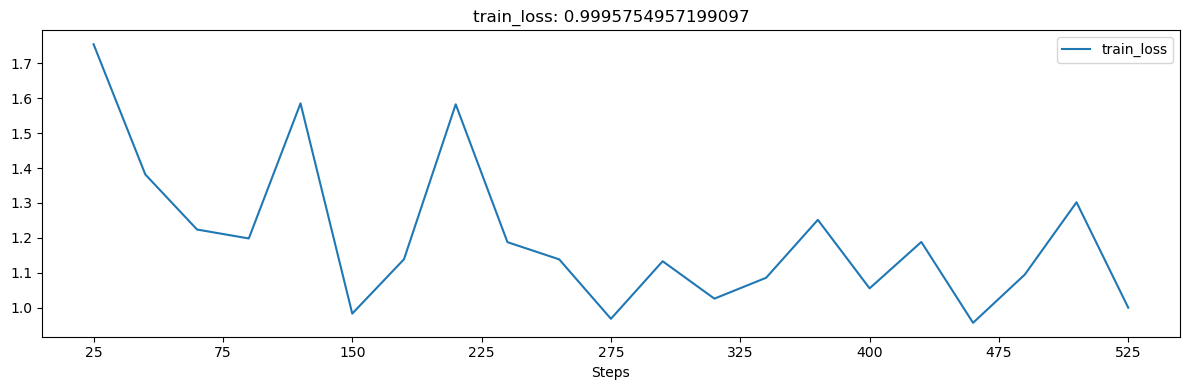

In [15]:
history1=hl.History()
canvas1=hl.Canvas()
logStep=25
for epoch in range(60):
    for step,(batch_x,batch_y) in enumerate(train_loader):
        _,output=FCNN1(batch_x)
#         print(batch_x.size())
#         print(batch_y.size())
        train_loss=lossFunc(output,batch_y.long())
        optomizerAdam.zero_grad()
        train_loss.backward()
        optomizerAdam.step()
        
        niter=epoch*len(train_loader)+step+1
        if niter % logStep ==0:
#             _,_,output=FCNN1(X_test)
            _,pre_lab=torch.max(output,1)
#             test_accuracy=accuracy_score(y_test,pre_lab)
            history1.log(niter,train_loss=train_loss)
            with canvas1:
                canvas1.draw_plot(history1['train_loss'])
#                 canvas1.draw_plot(history1['test_accuracy'])


In [62]:
# Validation 
from sklearn.metrics import f1_score

valid_data=pd.read_csv('BigData Data1/validation.csv',sep=',')

valid_data.isnull().sum() 

valid_data['a10'] = valid_data['a10'].fillna(valid_data['a10'].mean())
valid_data['a11'] = valid_data['a11'].fillna(valid_data['a11'].mean())
valid_data['a13'] = valid_data['a13'].fillna(valid_data['a13'].mean())
valid_data['a15'] = valid_data['a15'].fillna(valid_data['a15'].mean())
valid_data['a16'] = valid_data['a16'].fillna(valid_data['a16'].mean())
valid_data['a17'] = valid_data['a17'].fillna(valid_data['a17'].mean())
print(valid_data.isnull().sum())


a1             0
a2             0
a3             0
a4             0
a5             0
a6             0
a7             0
a8             0
a9             0
a10            0
a11            0
a12            0
a13            0
a14            0
a15            0
a16            0
a17            0
class label    0
dtype: int64


In [63]:
X_valid = valid_data.iloc[:, 0:17].values
y_valid = valid_data['class label'].values

scaler=MinMaxScaler(feature_range=(0,1))
X_valid=scaler.fit_transform(X_valid)


X_valid=torch.from_numpy(X_valid.astype(np.float32))
y_valid=torch.from_numpy(y_valid.astype(np.float32))

_,y_predict = FCNN1(X_valid)

In [64]:
print(type(y_predict))
print(y_predict.shape)
print(type(y_valid))
print(y_valid.shape)


<class 'torch.Tensor'>
torch.Size([150, 8])
<class 'torch.Tensor'>
torch.Size([150])


In [65]:
# y_predict = y_predict.detach().numpy()
# y_predict = np.around(y_predict,0).astype(int)
y_predict = y_predict.array()


AttributeError: 'Tensor' object has no attribute 'array'

In [58]:
y_valid = y_valid.numpy()
y_valid = np.around(y_valid,0).astype(int)
print(y_valid)
print(y_predict)

[4 5 7 6 7 7 4 7 7 1 3 5 1 0 1 1 2 3 0 4 7 0 2 2 1 4 6 6 4 0 3 1 5 6 1 2 1
 4 2 5 7 0 0 1 2 4 4 7 5 5 3 1 4 4 1 2 7 5 4 3 3 3 7 5 5 5 4 1 0 2 1 5 5 4
 6 3 6 5 3 5 7 6 6 7 4 6 4 7 7 3 1 5 7 7 5 1 6 7 7 5 2 7 0 0 5 2 1 1 7 7 2
 3 6 0 0 7 2 3 2 7 1 4 6 6 4 0 1 5 2 4 0 7 3 0 1 2 3 5 1 2 2 3 5 0 3 0 3 4
 5 4]
[[ 0  3  0 ...  0  0 13]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0 30]
 ...
 [ 0  4  0 ...  0  0 16]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  5]]


In [59]:
print(y_predict[2])
print(y_valid.shape)
print(y_predict.shape)

[ 0  0  0 24 15  0  0 30]
(150,)
(150, 8)


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_predict))

ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets

In [52]:
print(f1_score(y_valid, y_predict, average='macro'))

ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets